# M5 - Normalization & Scaling
**Student ID:** IT24100659  
**Focus:** Apply MinMax scaling to all numerical features  
**Visualization:** Side-by-side histograms showing before/after scaling



In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from urllib.parse import urlparse

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully")

Libraries imported successfully


In [ ]:
# Load data from M4 (Structure Analysis)
m4_output_path = "../results/outputs/m4_structure_features.csv"

if os.path.exists(m4_output_path):
    print("📂 Loading M4 output (URL Structure features)...")
    df = pd.read_csv(m4_output_path)
    print(f"✅ Loaded M4 data: {df.shape}")
    print(f"Existing features: {df.columns.tolist()}")
    
    # Extract only numeric features for scaling (exclude URL and Label)
    numeric_features = [col for col in df.columns if col not in ['URL', 'Label']]
    features_df = df[numeric_features]
    print(f"\\nNumeric features ready for scaling: {len(numeric_features)} features")
    print(f"Features: {numeric_features}")
else:
    print("⚠️ M4 output not found, loading raw data and extracting features...")
    df = pd.read_csv("../data/raw/phishing_site_urls.csv")
    print("Extracting basic features for scaling...")
    # Add basic features if M4 hasn't run
    df['url_length'] = df['URL'].str.len()
    features_df = df[['url_length']]
    numeric_features = ['url_length']

print("Data loaded successfully")
print(f"Dataset shape: {df.shape}")
print(f"Features to scale: {numeric_features}")
print("\\nFirst few rows:")
print(df.head())

Data loaded successfully
Dataset shape: (549346, 2)
Columns: ['URL', 'Label']

First few rows:
                                                 URL Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...   bad
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad
3  mail.printakid.com/www.online.americanexpress....   bad
4  thewhiskeydregs.com/wp-content/themes/widescre...   bad


## Feature Engineering
URL-based features that capture different aspects of phishing URLs:

In [ ]:
# M5 uses features from M1+M2+M3+M4 - No additional feature engineering needed
print("🔧 M5 Focus: Scaling and Normalization of existing features")
print(f"Using {len(numeric_features)} features from previous modules (M1-M4)")
print(f"Features to be scaled: {numeric_features}")

# Verify all features are numeric and handle any issues
print("\n📊 Feature Data Types:")
print(features_df.dtypes)

print("\nFeature Statistics Before Scaling:")
print(features_df.describe().round(4))

Extracting features from URLs...
Processed 0 URLs...
Processed 50000 URLs...
Processed 50000 URLs...
Processed 100000 URLs...
Processed 100000 URLs...
Processed 150000 URLs...
Processed 150000 URLs...
Processed 200000 URLs...
Processed 200000 URLs...
Processed 250000 URLs...
Processed 250000 URLs...
Processed 300000 URLs...
Processed 300000 URLs...
Processed 350000 URLs...
Processed 350000 URLs...
Processed 400000 URLs...
Processed 400000 URLs...
Processed 450000 URLs...
Processed 450000 URLs...
Processed 500000 URLs...
Processed 500000 URLs...
Feature extraction completed
Features extracted: ['url_length', 'hostname_length', 'num_dots', 'num_slashes', 'num_hyphens', 'num_underscores', 'num_question_marks', 'num_equal_signs', 'num_ampersands', 'num_at_symbols', 'num_double_slashes', 'has_https', 'has_http', 'has_ip', 'digit_density', 'subdomain_count', 'path_depth', 'has_suspicious_words']
Feature matrix shape: (549346, 18)
Feature extraction completed
Features extracted: ['url_length'

In [4]:
# Combine original data with features
df_with_features = pd.concat([df, features_df], axis=1)

# Display feature statistics
print("Feature Statistics:")
print(features_df.describe())

# Check for missing values
print("\nMissing values check:")
print(features_df.isnull().sum())

# Handle any missing values if present
if features_df.isnull().values.any():
    print("Missing values detected. Filling with median...")
    features_df = features_df.fillna(features_df.median())
    print("Missing values handled")

Feature Statistics:
          url_length  hostname_length       num_dots    num_slashes  \
count  549346.000000    549346.000000  549346.000000  549346.000000   
mean       50.736288        17.173843       2.062316       2.445168   
std        44.418080        11.607666       1.514629       1.595707   
min         1.000000         0.000000       0.000000       0.000000   
25%        29.000000        12.000000       1.000000       1.000000   
50%        40.000000        16.000000       2.000000       2.000000   
75%        59.000000        20.000000       2.000000       3.000000   
max      2307.000000       279.000000      37.000000      35.000000   

         num_hyphens  num_underscores  num_question_marks  num_equal_signs  \
count  549346.000000    549346.000000       549346.000000    549346.000000   
mean        1.126461         0.390845            0.161390         0.278629   
std         2.424343         1.317131            0.512545         0.956683   
min         0.000000        

## MinMax Scaling Implementation
Apply MinMax scaling to normalize all numerical features to the range [0, 1]:

In [ ]:
# All numeric features are already selected from M4 output
print(f"📋 Features to be scaled: {len(numeric_features)}")
print(f"Feature list: {numeric_features}")

# Verify data quality before scaling
print(f"\n🔍 Data Quality Check:")
print(f"Missing values: {features_df.isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(features_df.select_dtypes(include=[np.number])).sum().sum()}")

# Initialize MinMax Scaler
scaler = MinMaxScaler()

# Apply MinMax scaling
scaled_values = scaler.fit_transform(features_df[numeric_features])

# Create scaled DataFrame
features_scaled = pd.DataFrame(scaled_values, columns=numeric_features, index=features_df.index)

# Combine with original data
df_final = pd.concat([df[['URL', 'Label']], features_scaled], axis=1)

print("MinMax scaling completed!")
print(f"Scaled data shape: {df_final.shape}")

# Verify scaling results
print("\nScaling verification:")
print(f"Original data range example - url_length: [{features_df['url_length'].min():.2f}, {features_df['url_length'].max():.2f}]")
print(f"Scaled data range example - url_length: [{features_scaled['url_length'].min():.2f}, {features_scaled['url_length'].max():.2f}]")

Features to be scaled: 18
Feature list: ['url_length', 'hostname_length', 'num_dots', 'num_slashes', 'num_hyphens', 'num_underscores', 'num_question_marks', 'num_equal_signs', 'num_ampersands', 'num_at_symbols', 'num_double_slashes', 'has_https', 'has_http', 'has_ip', 'digit_density', 'subdomain_count', 'path_depth', 'has_suspicious_words']
MinMax scaling completed!
Scaled data shape: (549346, 20)

Scaling verification:
Original data range example - url_length: [1.00, 2307.00]
Scaled data range example - url_length: [0.00, 1.00]
MinMax scaling completed!
Scaled data shape: (549346, 20)

Scaling verification:
Original data range example - url_length: [1.00, 2307.00]
Scaled data range example - url_length: [0.00, 1.00]


## Visualization: Before vs After Scaling
Side-by-side histograms to show the effect of MinMax scaling on our features:

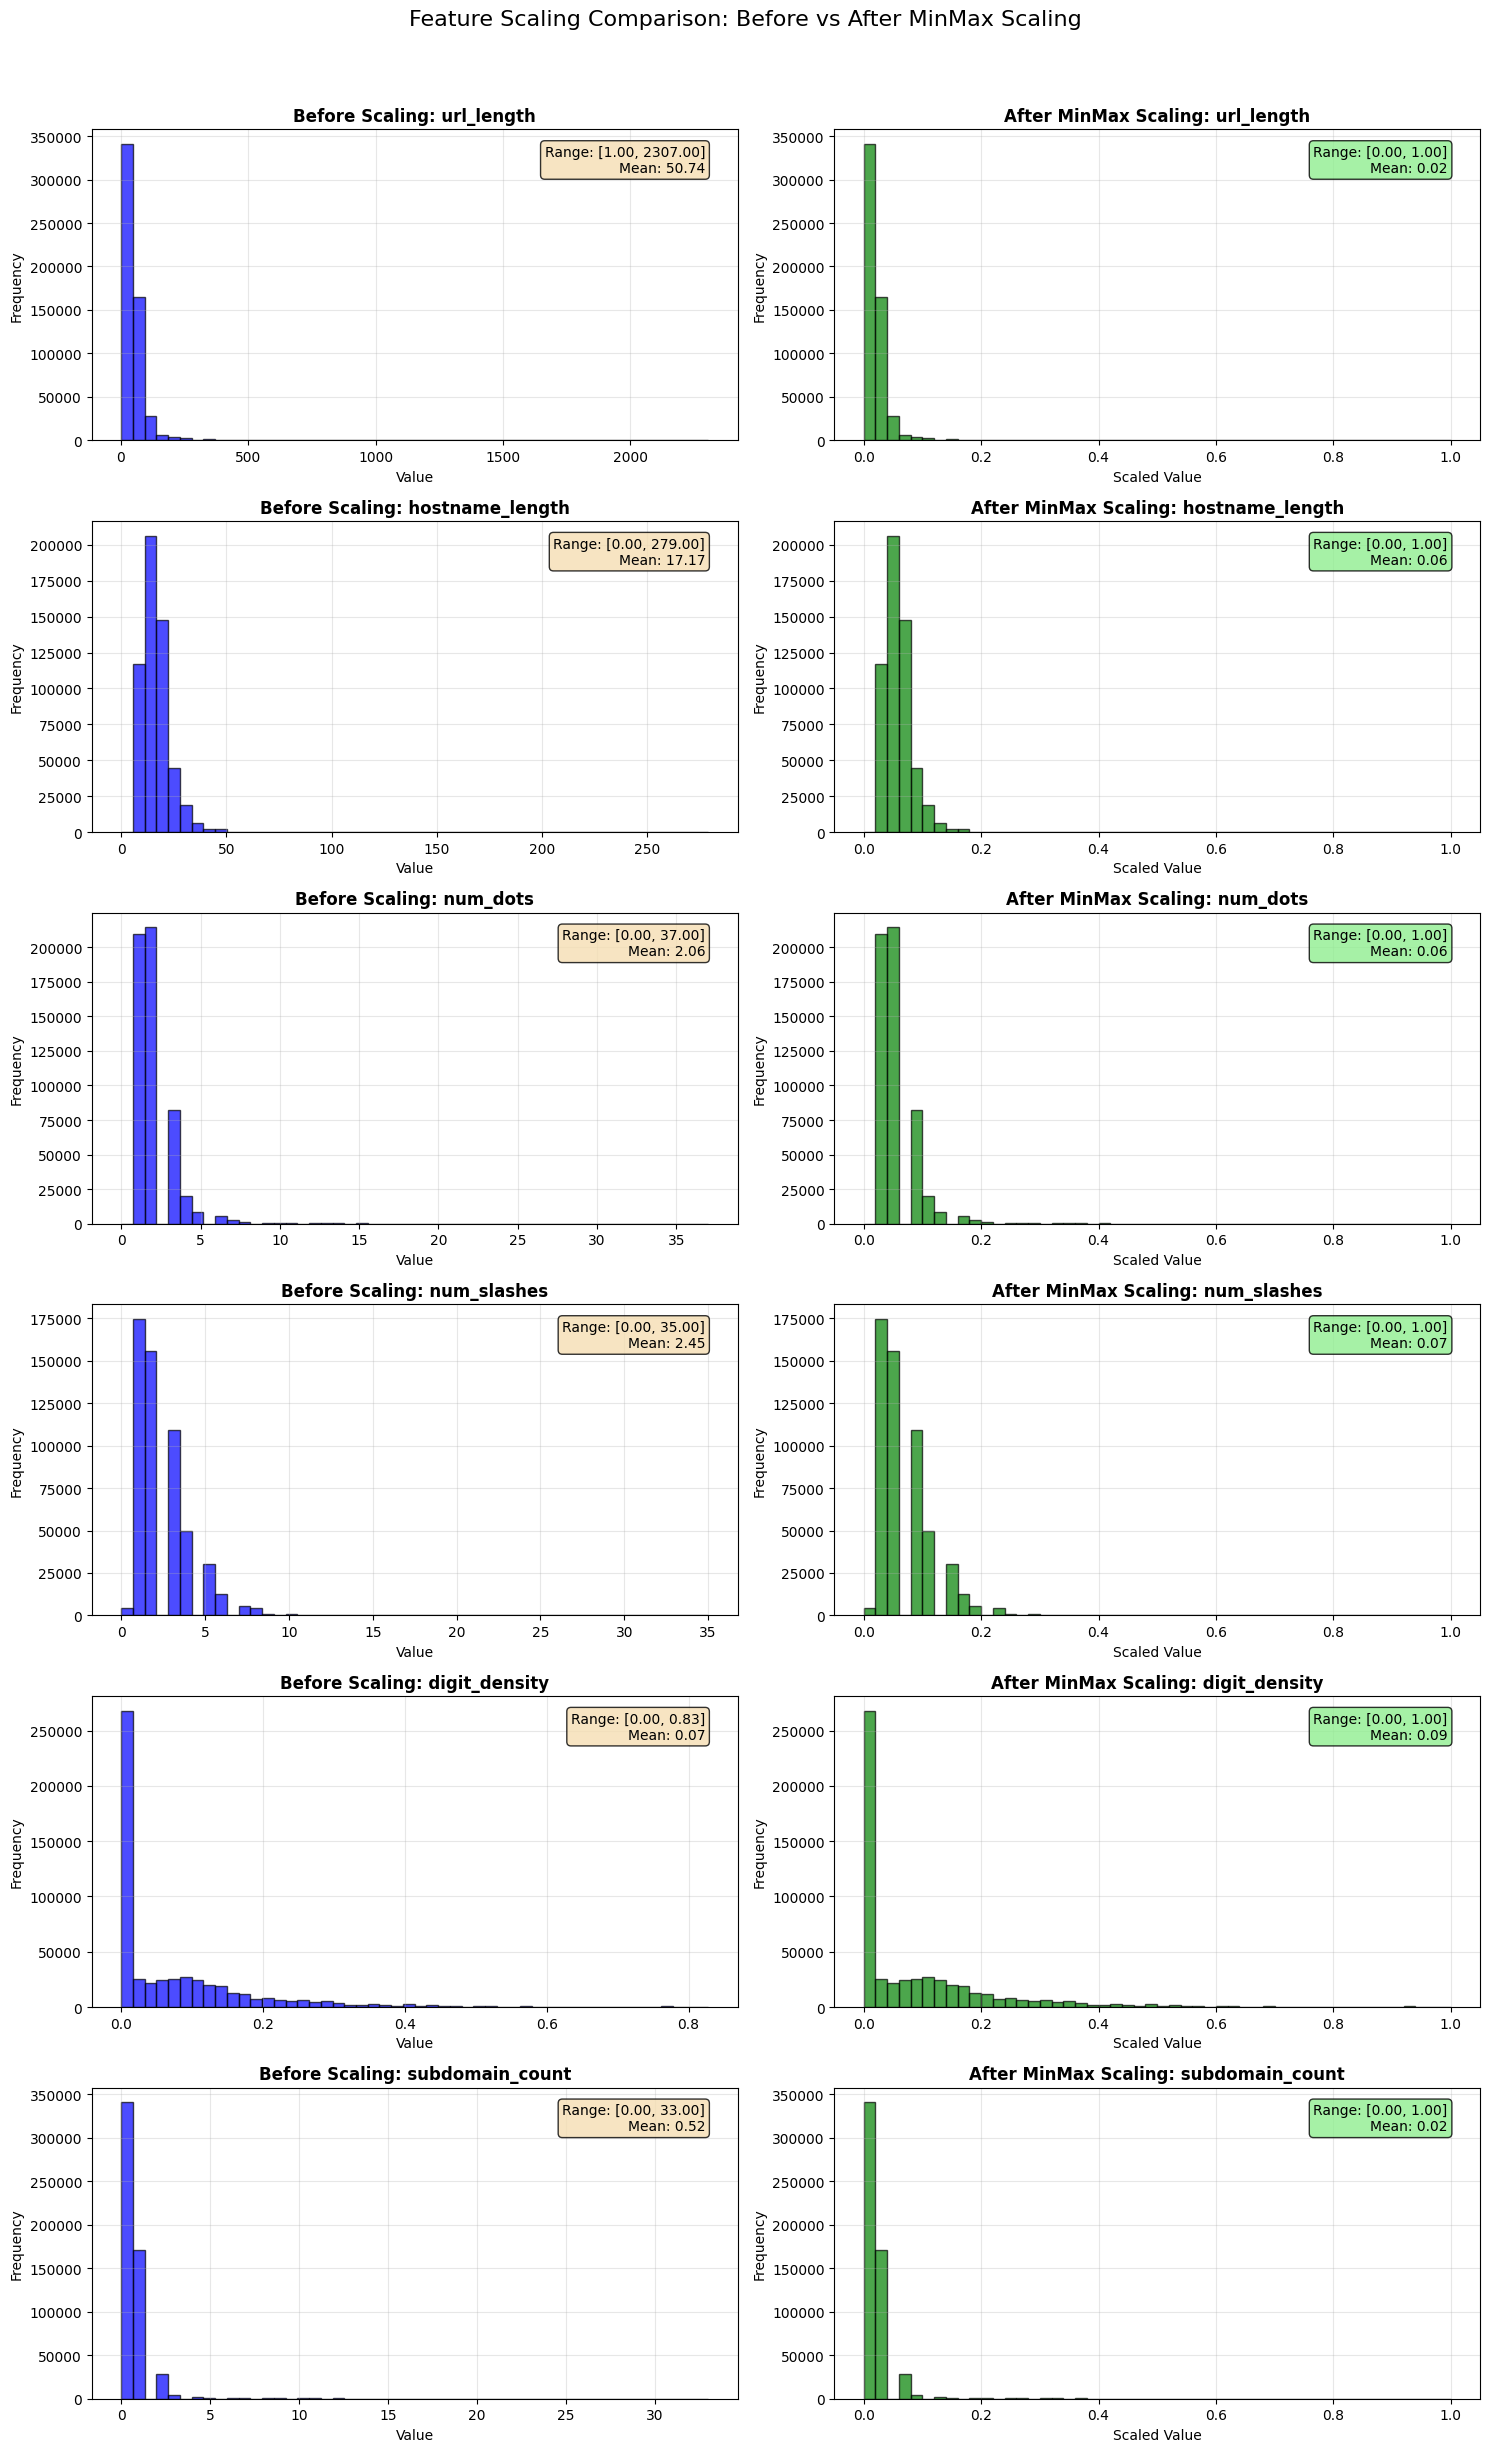

In [6]:
# Select key features for visualization (to avoid too many plots)
key_features = ['url_length', 'hostname_length', 'num_dots', 'num_slashes', 'digit_density', 'subdomain_count']

# Create before/after comparison plots
fig, axes = plt.subplots(len(key_features), 2, figsize=(15, 4*len(key_features)))
fig.suptitle('Feature Scaling Comparison: Before vs After MinMax Scaling', fontsize=16, y=1.02)

for i, feature in enumerate(key_features):
    # Before Scaling (Left column)
    axes[i, 0].hist(features_df[feature], bins=50, alpha=0.7, color='blue', edgecolor='black')
    axes[i, 0].set_title(f'Before Scaling: {feature}', fontweight='bold')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Add statistics text
    stats_before = f'Range: [{features_df[feature].min():.2f}, {features_df[feature].max():.2f}]\nMean: {features_df[feature].mean():.2f}'
    axes[i, 0].text(0.95, 0.95, stats_before, transform=axes[i, 0].transAxes, 
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # After Scaling (Right column)
    axes[i, 1].hist(features_scaled[feature], bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[i, 1].set_title(f'After MinMax Scaling: {feature}', fontweight='bold')
    axes[i, 1].set_xlabel('Scaled Value')
    axes[i, 1].set_ylabel('Frequency')
    axes[i, 1].grid(True, alpha=0.3)
    
    # Add statistics text
    stats_after = f'Range: [{features_scaled[feature].min():.2f}, {features_scaled[feature].max():.2f}]\nMean: {features_scaled[feature].mean():.2f}'
    axes[i, 1].text(0.95, 0.95, stats_after, transform=axes[i, 1].transAxes, 
                    verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.show()

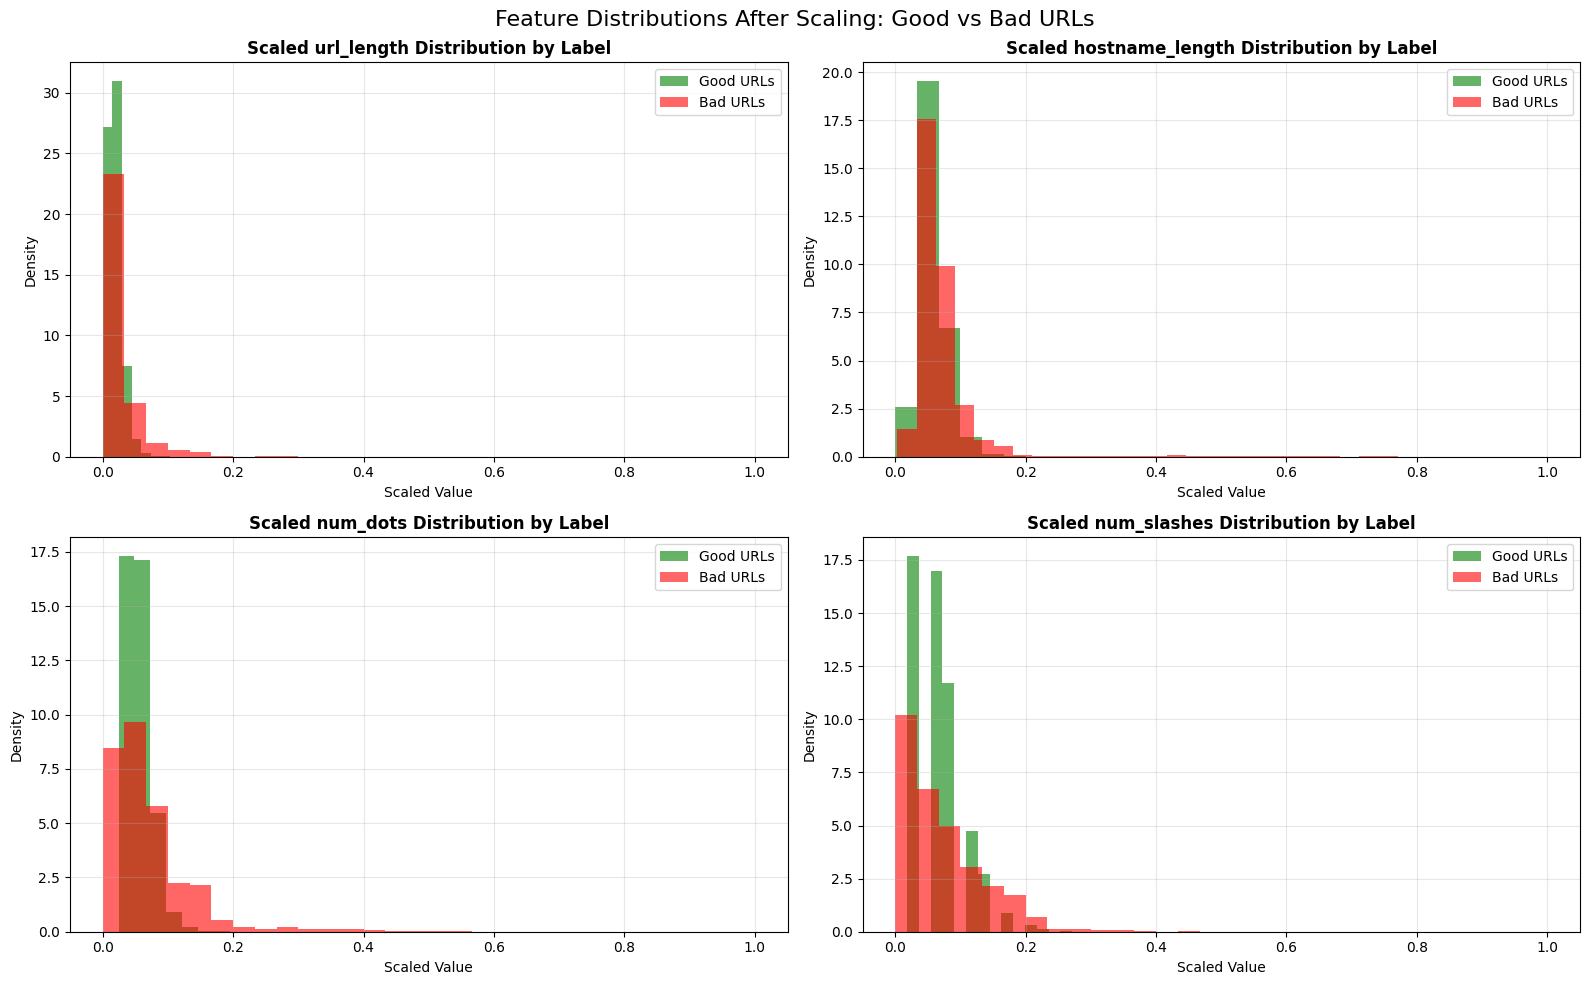

In [7]:
# Additional visualization: Feature distribution by label
plt.figure(figsize=(16, 10))

for i, feature in enumerate(key_features[:4]):  # Show top 4 features
    plt.subplot(2, 2, i+1)
    
    # Separate data by label
    good_data = features_scaled[df['Label'] == 'good'][feature]
    bad_data = features_scaled[df['Label'] == 'bad'][feature]
    
    # Create overlapping histograms
    plt.hist(good_data, bins=30, alpha=0.6, label='Good URLs', color='green', density=True)
    plt.hist(bad_data, bins=30, alpha=0.6, label='Bad URLs', color='red', density=True)
    
    plt.title(f'Scaled {feature} Distribution by Label', fontweight='bold')
    plt.xlabel('Scaled Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.suptitle('Feature Distributions After Scaling: Good vs Bad URLs', fontsize=16)
plt.tight_layout()
plt.show()

## Summary Table and Analysis

FEATURE SCALING SUMMARY TABLE
                 Feature  Original Min  Original Max  Original Mean  \
0             url_length           1.0     2307.0000        50.7363   
1        hostname_length           0.0      279.0000        17.1738   
2               num_dots           0.0       37.0000         2.0623   
3            num_slashes           0.0       35.0000         2.4452   
4            num_hyphens           0.0       42.0000         1.1265   
5        num_underscores           0.0      200.0000         0.3908   
6     num_question_marks           0.0      166.0000         0.1614   
7        num_equal_signs           0.0       34.0000         0.2786   
8         num_ampersands           0.0       37.0000         0.1334   
9         num_at_symbols           0.0       10.0000         0.0039   
10    num_double_slashes           0.0        6.0000         0.0039   
11             has_https           0.0        1.0000         0.0002   
12              has_http           0.0        1

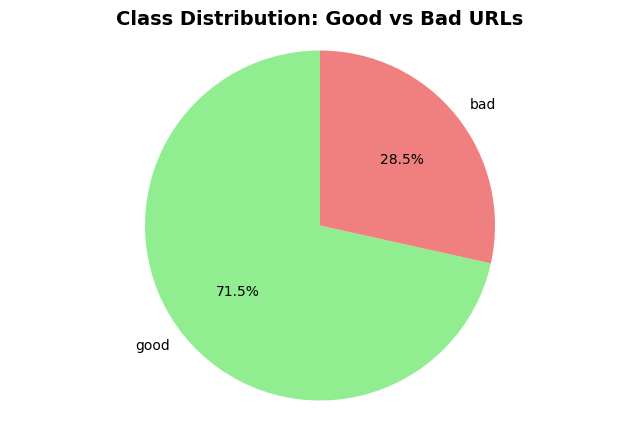

In [8]:
# summary table
summary_data = []
for feature in numeric_features:
    summary_data.append({
        'Feature': feature,
        'Original Min': features_df[feature].min(),
        'Original Max': features_df[feature].max(),
        'Original Mean': features_df[feature].mean(),
        'Original Std': features_df[feature].std(),
        'Scaled Min': features_scaled[feature].min(),
        'Scaled Max': features_scaled[feature].max(),
        'Scaled Mean': features_scaled[feature].mean(),
        'Scaled Std': features_scaled[feature].std()
    })

summary_df = pd.DataFrame(summary_data)

# Display summary table
print("FEATURE SCALING SUMMARY TABLE")
print("=" * 80)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(summary_df.round(4))

# Class balance check
print(f"\nCLASS BALANCE:")
print(df['Label'].value_counts())
print(f"Class distribution: {df['Label'].value_counts(normalize=True).round(4)}")

# class balance visualization
plt.figure(figsize=(8, 5))
class_counts = df['Label'].value_counts()
colors = ['lightgreen', 'lightcoral']
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Class Distribution: Good vs Bad URLs', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

## Save Processed Data

In [ ]:
# Create output directory
output_dir = "../results/outputs"
os.makedirs(output_dir, exist_ok=True)

# Save the scaled dataset
# Save M5 results for M6 (Feature Selection & Encoding)
output_path = os.path.join(output_dir, "m5_scaled_features.csv")
df_final.to_csv(output_path, index=False)
print(f"📊 Scaled dataset saved to: {output_path}")
print(f"✅ Ready for M6 (Feature Selection & Label Encoding)")

# Save the scaler object for future use
import pickle
scaler_path = os.path.join(output_dir, "minmax_scaler_M5.pkl")
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"🔧 MinMax scaler saved to: {scaler_path}")

# Save summary table
summary_path = os.path.join(output_dir, "scaling_summary_M5.csv")
summary_df.to_csv(summary_path, index=False)
print(f"📋 Summary table saved to: {summary_path}")

print(f"\nFinal dataset shape: {df_final.shape}")
print(f"Features: {len(numeric_features)} numerical features scaled")
print(f"\n🎯 M5 Analysis Complete: All features successfully scaled using MinMax normalization")


Scaled dataset saved to: ../results/outputs/features_scaled_M5.csv
MinMax scaler saved to: ../results/outputs/minmax_scaler_M5.pkl
Summary table saved to: ../results/outputs/scaling_summary_M5.csv

Final dataset shape: (549346, 20)
Features: 18 numerical features scaled
